## Past Literature

Chael Sonnen videos - Reach only matters to those who know how to use it.

Size matters article - https://bleacherreport.com/articles/497098-ufc-121-brock-lesnar-and-5-fights-that-proved-size-matters-video - therefore add some of the size factors, like height and reach.

'Styles make fights' - would suggest that things such as stance and main fighting area (wrestling, boxing, BJJ) would impact how fighters perform against each other.

Past record would generally suggest something about the future.

Odds makers will tend to have slightly more information compared to the average individual. Potentially even inside information.

Past match, Conor McGregor said that he felt out of practice (also Chael Sonnen video). This might give the indication that time outside of the ring would be a factor. However, this might be a quadratic relationship as time is needed to recover inbetween fights, but after a certain period, not fighting will likely decrease performance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
address = 'fighter_data_final_v14.csv'

data = pd.read_csv(address)
print(data.shape)
data = data[1000:]
data.head()

(11862, 80)


/Users/thomas/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (6,7,8,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,index,Unnamed: 0.1_x,Date,Fighter,Opponent,KD_F,KD_O,STR_F,STR_O,...,Days_dif,Rounds_dif,Perf_of_Night_dif,Seconds_in_Ring_dif,Win_dif,Loss_dif,TD_per_min,KD_per_min,SUB_per_min,STR_per_min
1000,500,500,5416,2005-10-07,Joe Riggs,Chris Lytle,0,0,15,3,...,-70,-9,0,-711,-1,-2,0.472441,0.000000,0.000000,5.511811
1001,500,500,5416,2005-10-07,Chris Lytle,Joe Riggs,0,0,15,3,...,70,9,0,711,1,2,0.164835,0.054945,0.384615,5.054945
1002,501,501,5415,2005-10-07,Renato Sobral,Chael Sonnen,0,0,11,12,...,-4054,12,0,1099,3,2,0.545951,0.000000,0.491356,4.149227
1003,501,501,5415,2005-10-07,Chael Sonnen,Renato Sobral,0,0,11,12,...,4054,-12,0,-1099,-3,-2,NaN,NaN,NaN,NaN
1004,502,502,5414,2005-10-07,Forrest Griffin,Elvis Sinosic,1,0,30,18,...,-1057,-2,0,-372,1,-3,0.410959,0.000000,0.273973,12.465753


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10862 entries, 1000 to 11861
Data columns (total 80 columns):
Unnamed: 0                 10862 non-null int64
index                      10862 non-null int64
Unnamed: 0.1_x             10862 non-null int64
Date                       10862 non-null object
Fighter                    10862 non-null object
Opponent                   10862 non-null object
KD_F                       10862 non-null object
KD_O                       10862 non-null object
STR_F                      10862 non-null object
STR_O                      10862 non-null object
TD_F                       10862 non-null object
TD_O                       10862 non-null object
SUB_F                      10862 non-null object
SUB_O                      10862 non-null object
WEIGHT CLASS               10862 non-null object
PERF                       10862 non-null int64
FINISH                     10862 non-null object
METHOD                     5446 non-null object
ROUND      

In [4]:
data = data.drop(['Unnamed: 0', 'index', 'KD_F', 'KD_O', 'STR_F', 'STR_O', 'TD_F', 'TD_O', 'SUB_F', 'SUB_O',
                 'PERF', 'FINISH', 'METHOD', 'ROUND', 'TIME', 'past_TIME_F', 'past_TIME_O', 'Unnamed: 0.1_x',
                  'Unnamed: 0.1_y', 'Date_Adj'
#                  'Wt_F', 'Wt_O',
                 ], axis = 1)

# dropping weight as HW class has unknowns

# all_new_fighters = list(data[(data['past_W_F']== 0) & (data['past_W_O']== 0) & 
#                              (data['past_L_F']== 0) & (data['past_L_O']== 0)].index)
# data = data.drop(all_new_fighters, axis = 0)

data = data.drop(['past_KD_F', 'past_KD_O', 'past_STR_F', 'past_STR_O', 'past_TD_F', 'past_TD_O', 
                  'past_SUB_F', 'past_SUB_O', 'Ht_F', 'Wt_F', 'Reach_F', 'Ht_O', 'Wt_O', 'Reach_O',
                  'elo_O', 'elo_F', 'past_W_F', 'past_L_F', 'past_W_O', 'past_L_O', 'Unnamed: 0.1',
#                  'Wt_F', 'Wt_O',
#                   'Unnamed: 0.1.1'
                 ], axis = 1)

print(data.shape)
data.head()

(10862, 39)


,Date,Fighter,Opponent,WEIGHT CLASS,average_odds_F,average_odds_O,past_W_%_F,past_L_%_F,past_W_%_O,past_L_%_O,...,Days_dif,Rounds_dif,Perf_of_Night_dif,Seconds_in_Ring_dif,Win_dif,Loss_dif,TD_per_min,KD_per_min,SUB_per_min,STR_per_min
1000,2005-10-07,Joe Riggs,Chris Lytle,Welterweight,NaN,NaN,0.5,0.5,0.40,0.60,...,-70,-9,0,-711,-1,-2,0.472441,0.000000,0.000000,5.511811
1001,2005-10-07,Chris Lytle,Joe Riggs,Welterweight,NaN,NaN,0.4,0.6,0.50,0.50,...,70,9,0,711,1,2,0.164835,0.054945,0.384615,5.054945
1002,2005-10-07,Renato Sobral,Chael Sonnen,Light Heavyweight,NaN,NaN,0.6,0.4,NaN,NaN,...,-4054,12,0,1099,3,2,0.545951,0.000000,0.491356,4.149227
1003,2005-10-07,Chael Sonnen,Renato Sobral,Light Heavyweight,NaN,NaN,NaN,NaN,0.60,0.40,...,4054,-12,0,-1099,-3,-2,NaN,NaN,NaN,NaN
1004,2005-10-07,Forrest Griffin,Elvis Sinosic,Light Heavyweight,NaN,NaN,1.0,0.0,0.25,0.75,...,-1057,-2,0,-372,1,-3,0.410959,0.000000,0.273973,12.465753


In [5]:
# data.info()

In [6]:
# data = data.drop(['average_odds_F', 'average_odds_O', 'past_W_%_F', 'past_W_%_O', 'past_L_%_F', 'past_L_%_O', 
#                  ], axis = 1)
# data.info()

In [7]:
data.dropna(inplace = True)

In [8]:
num_cols = data._get_numeric_data().columns
len(num_cols)

33

In [9]:
cat_cols = list(set(data.columns) - set(num_cols))

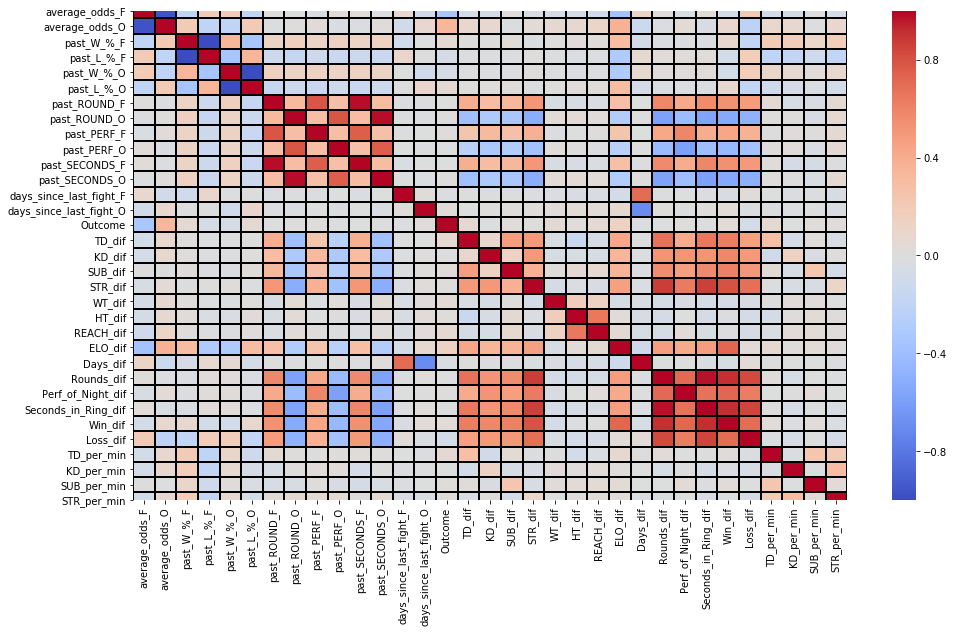

In [10]:
plt.figure(figsize=(16,9))

sns.heatmap(data.corr(), annot=False, linewidths = 1, cmap="coolwarm", linecolor="k")

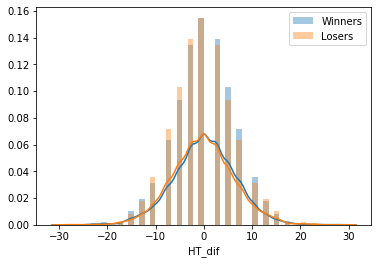

In [11]:
winners = data[data['Outcome'] == 1]
losers = data[data['Outcome'] == 0]

sns.distplot(winners['HT_dif'], label='Winners')
sns.distplot(losers['HT_dif'], label='Losers')
plt.legend()

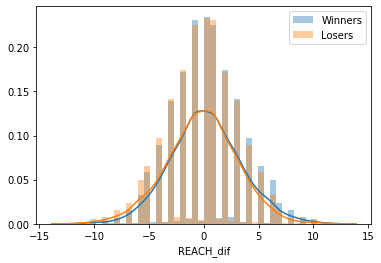

In [12]:
sns.distplot(winners['REACH_dif'], label='Winners')
sns.distplot(losers['REACH_dif'], label='Losers')
plt.legend()

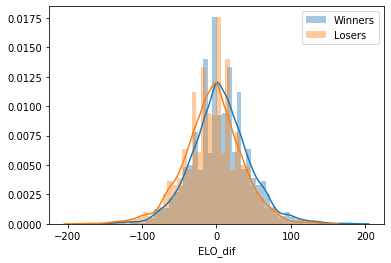

In [13]:
sns.distplot(winners['ELO_dif'], label='Winners')
sns.distplot(losers['ELO_dif'], label='Losers')
plt.legend()

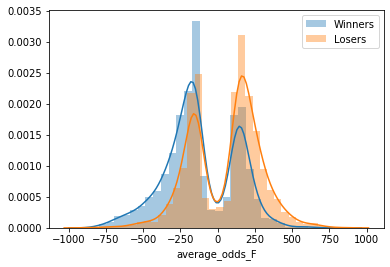

In [14]:
sns.distplot(winners['average_odds_F'], label='Winners')
sns.distplot(losers['average_odds_F'], label='Losers')
plt.legend()

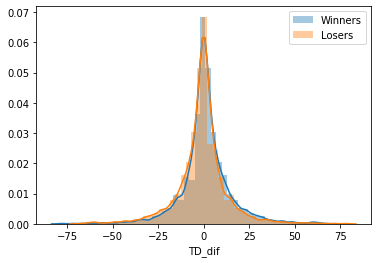

In [15]:
sns.distplot(winners['TD_dif'], label='Winners')
sns.distplot(losers['TD_dif'], label='Losers')
plt.legend()

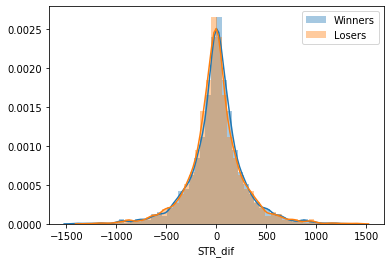

In [16]:
sns.distplot(winners['STR_dif'], label='Winners')
sns.distplot(losers['STR_dif'], label='Losers')
plt.legend()

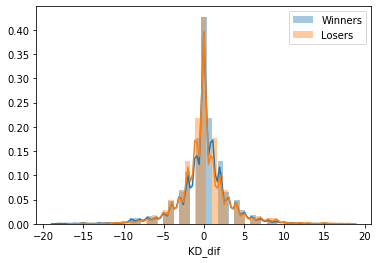

In [17]:
sns.distplot(winners['KD_dif'], label='Winners')
sns.distplot(losers['KD_dif'], label='Losers')
plt.legend()

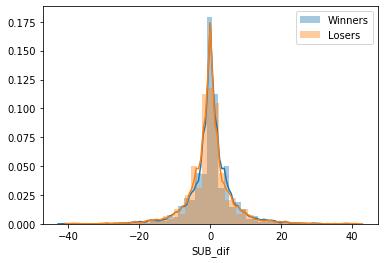

In [18]:
sns.distplot(winners['SUB_dif'], label='Winners')
sns.distplot(losers['SUB_dif'], label='Losers')
plt.legend()

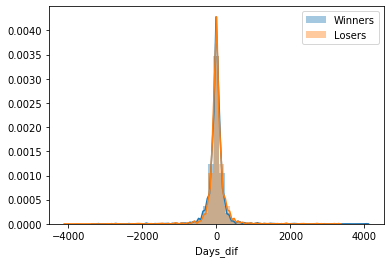

In [19]:
sns.distplot(winners['Days_dif'], label='Winners')
sns.distplot(losers['Days_dif'], label='Losers')
plt.legend()

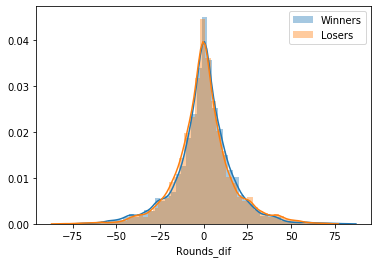

In [20]:
sns.distplot(winners['Rounds_dif'], label='Winners')
sns.distplot(losers['Rounds_dif'], label='Losers')
plt.legend()

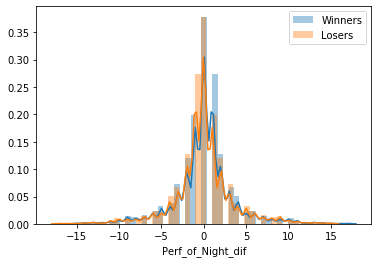

In [21]:
sns.distplot(winners['Perf_of_Night_dif'], label='Winners')
sns.distplot(losers['Perf_of_Night_dif'], label='Losers')
plt.legend()

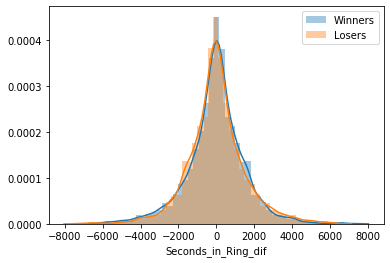

In [22]:
sns.distplot(winners['Seconds_in_Ring_dif'], label='Winners')
sns.distplot(losers['Seconds_in_Ring_dif'], label='Losers')
plt.legend()

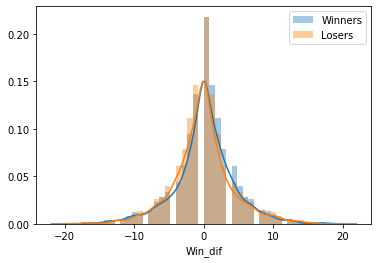

In [23]:
sns.distplot(winners['Win_dif'], label='Winners')
sns.distplot(losers['Win_dif'], label='Losers')
plt.legend()

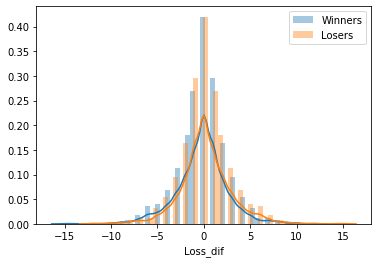

In [24]:
sns.distplot(winners['Loss_dif'], label='Winners')
sns.distplot(losers['Loss_dif'], label='Losers')
plt.legend()

How are people using their reach? For TDs, KDs, SUBs?

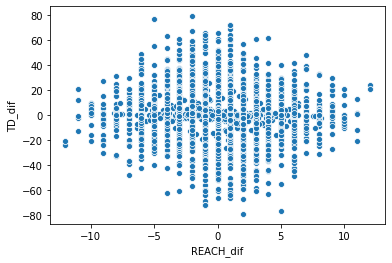

In [25]:
sns.scatterplot(x = data['REACH_dif'], y = data['TD_dif'])

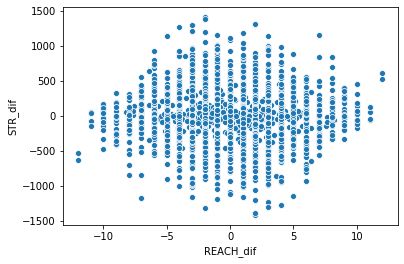

In [26]:
sns.scatterplot(x = data['REACH_dif'], y = data['STR_dif'])

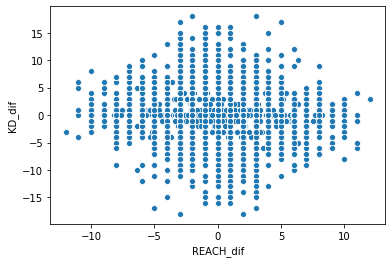

In [27]:
sns.scatterplot(x = data['REACH_dif'], y = data['KD_dif'])

### Looking at Different Stances

Text(0, 0.5, 'Wins/Losses')

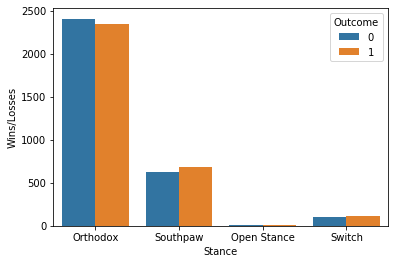

In [28]:
sns.countplot(data['Stance_F'], hue = data['Outcome'])
plt.xlabel('Stance')
plt.ylabel('Wins/Losses')

Text(0, 0.5, 'Wins/Losses')

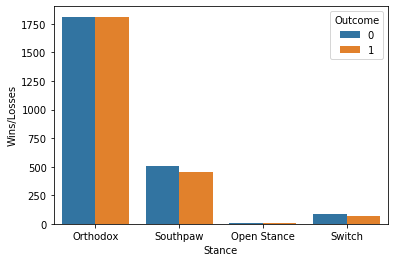

In [29]:
ortodox = data[data['Stance_F'] == 'Orthodox']

sns.countplot(ortodox['Stance_O'], hue = ortodox['Outcome'])
plt.xlabel('Stance')
plt.ylabel('Wins/Losses')

Text(0, 0.5, 'Wins/Losses')

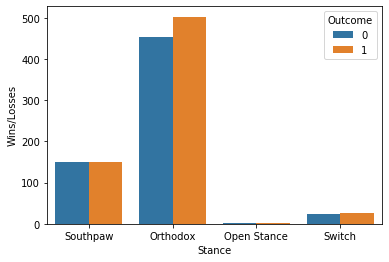

In [30]:
southpaw = data[data['Stance_F'] == 'Southpaw']

sns.countplot(southpaw['Stance_O'], hue = southpaw['Outcome'])
plt.xlabel('Stance')
plt.ylabel('Wins/Losses')

Text(0, 0.5, 'Wins/Losses')

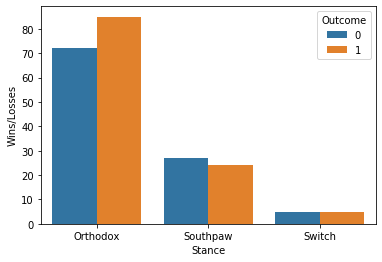

In [31]:
switch = data[data['Stance_F'] == 'Switch']

sns.countplot(switch['Stance_O'], hue = switch['Outcome'])
plt.xlabel('Stance')
plt.ylabel('Wins/Losses')

The best stance generally is Ortodox, however, it seems that Switch might be better specifically agianst Ortodox, which is more common, meaning fighters might be better off by doing this. We will have to investigate more how much we can trust this larger difference given the smaller sample size.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 <a list of 43 Text xticklabel objects>)

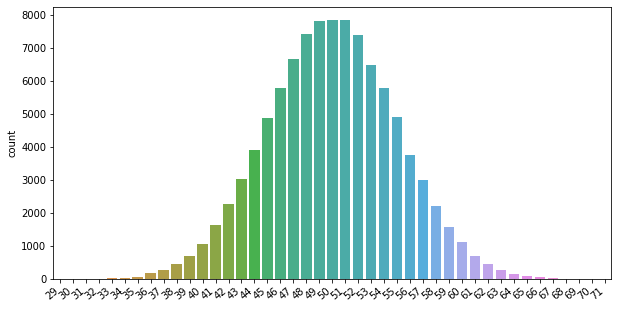

In [32]:
plt.figure(figsize=(10,5))

a = np.random.binomial(100, 0.5, 100000)
sns.countplot(a)
plt.xticks(rotation = 40, ha = 'right')

In [33]:
southpaw_win_v_orthodox = southpaw[(southpaw['Outcome'] == 1) & (southpaw['Stance_O'] == 'Orthodox')]
southpaw_loss_v_orthodox = southpaw[(southpaw['Outcome'] == 0) & (southpaw['Stance_O'] == 'Orthodox')]
percentage_southpaw_win_v_orthodox = (len(southpaw_win_v_orthodox) / 
                        (len(southpaw_win_v_orthodox) + len(southpaw_loss_v_orthodox)))

print('Southpaw wins vs Othodox', len(southpaw_win_v_orthodox))
print('Southpaw losses vs Othodox', len(southpaw_loss_v_orthodox))
print('Percentage won:', round(percentage_southpaw_win_v_orthodox * 100,2), '%')

Southpaw wins vs Othodox 503
Southpaw losses vs Othodox 453
Percentage won: 52.62 %


In [34]:
switch_win_v_orthodox = switch[(switch['Outcome'] == 1) & (switch['Stance_O'] == 'Orthodox')]
switch_loss_v_orthodox = switch[(switch['Outcome'] == 0) & (switch['Stance_O'] == 'Orthodox')]

print('Switch wins vs Othodox', len(switch_win_v_orthodox))
print('Switch losses vs Othodox', len(switch_loss_v_orthodox))
print('Percentage won:', round((len(switch_win_v_orthodox) / 
                        (len(switch_win_v_orthodox) + len(switch_loss_v_orthodox))) * 100,2), '%')

Switch wins vs Othodox 85
Switch losses vs Othodox 72
Percentage won: 54.14 %


Need to work out which of these is more statistically significant. The plan to do this is to look at which is more statistically significant (less likely) compared to a standard binomial expansion, with n = n and p = 0.5.

In [35]:
total_southpaw_vs_orthodox = len(southpaw_win_v_orthodox) + len(southpaw_loss_v_orthodox)

binomial_southpaw = np.random.binomial(total_southpaw_vs_orthodox, 0.5, 1000000)
print('Probability of seeing observed result:', 
      round((sum(binomial_southpaw >= len(southpaw_win_v_orthodox)) / len(binomial_southpaw)) * 100, 3), '%')

Probability of seeing observed result: 5.696 %


In [36]:
total_switch_vs_orthodox = len(switch_win_v_orthodox) + len(switch_loss_v_orthodox)

binomial_switch = np.random.binomial(total_switch_vs_orthodox, 0.5, 1000000)
print('Probability of seeing observed result:', 
      round((sum(binomial_switch >= len(switch_win_v_orthodox)) / len(binomial_switch)) * 100, 3), '%')

Probability of seeing observed result: 16.863 %


In [37]:
total_switch_vs_orthodox = len(switch_win_v_orthodox) + len(switch_loss_v_orthodox)

binomial_switch = np.random.binomial(total_switch_vs_orthodox, percentage_southpaw_win_v_orthodox, 1000000)
print('Probability of seeing observed result:', 
      round((sum(binomial_switch >= len(switch_win_v_orthodox)) / len(binomial_switch)) * 100, 3), '%')

Probability of seeing observed result: 38.224 %


## Different Types of Fighters

There is no direct feature to say if someone is mainly a striker or a grappler, or even a combination between the two. However, it would be reasonable to assume that strikers would tend to have more finishes on their feet (more KDs and more STRs) and grapplers would have more finishes on the ground (SUBs and TDs). Therefore, a decent proxy might be to compare how fighters with more grappler heavy stats does against fighters with more striking heavy stats, to see which does better and which might be the preferred style if you had to choose one.

One potential downfall of this might be that fighters nowadays aren't trained in a specific discipline and so the populations that we are comparing might not represent what how world-class boxers would really do against world-class wrestlers.

In [38]:
data_types_of_fighter_full = pd.read_csv(address)
data_types_of_fighter_full = data_types_of_fighter_full
data_types_of_fighter_full = data_types_of_fighter_full.drop(['Unnamed: 0', 'index', 'Unnamed: 0.1_x',
                  'Unnamed: 0.1_y', 'Date_Adj', 'Unnamed: 0.1'
                 ], axis = 1)

We can group based on a couple of different columns. Either, the method of finish, or the total number of past 
actions (strikes, takedowns, submissions, knockdowns). We will look at both and initially, the past actions as this is what the fighter does most, compared to just how the match was finished. Also, there is a smaller sample size when looking at the method of finish as it only gives detail on the winner, cutting the population in half.

In [39]:
data_types_of_fighter_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11862 entries, 0 to 11861
Data columns (total 74 columns):
Date                       11862 non-null object
Fighter                    11862 non-null object
Opponent                   11862 non-null object
KD_F                       11862 non-null object
KD_O                       11862 non-null object
STR_F                      11862 non-null object
STR_O                      11862 non-null object
TD_F                       11862 non-null object
TD_O                       11862 non-null object
SUB_F                      11862 non-null object
SUB_O                      11862 non-null object
WEIGHT CLASS               11862 non-null object
PERF                       11862 non-null int64
FINISH                     11862 non-null object
METHOD                     6106 non-null object
ROUND                      11862 non-null int64
TIME                       11862 non-null object
average_odds_F             8056 non-null float64
average_odds

Split fighters into two groups, strikers and grapplers, based on total KD and STR vs total TD and SUBs. Strikes happen more often than SUBs as a SUB usually finishes the match and a TD is very rare. Therefore, grouping based on totals will not work.

There are a couple of ways to solve this, look at comparisons to the average, e.g. if a fighter is below average in STR and above in TD, they are likley a wrestler. However, this could get complicated if a fighter is above average in everything as would be the case for long-standing fighters. Just having more fights will increase your numbers. (Method A)

Another way would be to look the total proportion of STR, KD, TD, and SUBs for the whole dataset and then base the split off how each fighters stats compare to this. This can be quite complicated, but fixes the issues of one fighter having more fights because it will always be out of 100%. (Method B)

A final method would be to normalising the values, so that they are comparable. A one unit increase in STR is comparable to a one unit increase in TD. (Method C)

We will attempt Methods B and C, mainly to practice data manipulation, and secondly to compare which might give a better split of the population. Initially I think that Method C would be best.

In [40]:
data_types_of_fighter = data_types_of_fighter_full[['STR_F', 'TD_F', 'KD_F', 'SUB_F']]
data_types_of_fighter.dropna(inplace = True)

/Users/thomas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [41]:
# data_types_of_fighter['STR_F'].unique()
for col in data_types_of_fighter.columns:
    data_types_of_fighter[col] = data_types_of_fighter[col].apply(lambda x: str(x))
    data_types_of_fighter[col] = data_types_of_fighter[col].apply(lambda x: x.replace('--', '0'))
    data_types_of_fighter[col] = data_types_of_fighter[col].apply(lambda x: float(x))

/Users/thomas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/thomas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/thomas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [42]:
data_proportions = data_types_of_fighter.sum()
data_proportions
types = ['STR', 'TD', 'KD', 'SUB']
proportions = {}
for i in range(0, len(types)):
    proportions[types[i]] = ((data_proportions[i]) / (data_proportions.sum()))
    
proportions
# print('STR percentage is:', )

{'STR': 0.9443907404703942,
 'TD': 0.0340268379582319,
 'KD': 0.00853827427430587,
 'SUB': 0.013044147297068025}

STR are so dominant and even include strikes on the ground, therefore, it might make sense to eliminate them, and just look at how the fight got to the ground, TDs vs KDs.

In [43]:
data_proportions = data_types_of_fighter.sum()
data_proportions = data_proportions[1:-1]
types = ['TD', 'KD']
proportions = {}
for i in range(0, len(types)):
    proportions[types[i]] = ((data_proportions[i]) / (data_proportions.sum()))
    
proportions

{'TD': 0.7994067482387839, 'KD': 0.20059325176121617}

In [44]:
key_columns = ['KD_F', 'TD_F']
for col in key_columns:
    data_types_of_fighter_full[col] = data_types_of_fighter_full[col].apply(lambda x: str(x))
    data_types_of_fighter_full[col] = data_types_of_fighter_full[col].apply(lambda x: x.replace('--', '0'))
    data_types_of_fighter_full[col] = data_types_of_fighter_full[col].apply(lambda x: float(x))

data_fighters_group = data_types_of_fighter_full.groupby('Fighter')
data_fighters_group_trim = data_fighters_group[['TD_F', 'KD_F']].sum()

In [45]:
data_fighters_group_trim['TD_F_Percent'] = (data_fighters_group_trim['TD_F'] /
                                            (data_fighters_group_trim['TD_F'] + data_fighters_group_trim['KD_F']))
data_fighters_group_trim.dropna(inplace = True)

# if data_fighters_group_trim['TD_F_Percent'] >= proportions['TD']:
#     data_fighters_group_trim['Type'] = 'Grappler'
# else:
#     data_fighters_group_trim['Type'] = 'Striker'
    
# data_fighters_group_trim

data_fighters_group_trim['Type'] = np.where(data_fighters_group_trim['TD_F_Percent'] >= proportions['TD'],
                                           'Grappler',
                                           'Striker')
# data_fighters_group_trim['Fighter'] = data_fighters_group_trim.index

In [46]:
data_fighters_group_trim['Type_O'] = data_fighters_group_trim['Type']

In [47]:
data_fighters_group_trim

,TD_F,KD_F,TD_F_Percent,Type,Type_O
Fighter,,,,,
Aaron Brink,1.0,0.0,1.000000,Grappler,Grappler
Aaron Phillips,14.0,0.0,1.000000,Grappler,Grappler
Aaron Riley,15.0,2.0,0.882353,Grappler,Grappler
Aaron Rosa,1.0,0.0,1.000000,Grappler,Grappler
Aaron Simpson,27.0,5.0,0.843750,Grappler,Grappler
...,...,...,...,...,...
Zelim Imadaev,8.0,1.0,0.888889,Grappler,Grappler
Zhang Lipeng,13.0,0.0,1.000000,Grappler,Grappler
Zhang Tiequan,2.0,2.0,0.500000,Striker,Striker


In [48]:
data_types_of_fighter_final = pd.merge(left = data_types_of_fighter_full, right = data_fighters_group_trim['Type'],
                                        on = 'Fighter', how = 'left')
data_types_of_fighter_final = pd.merge(left = data_types_of_fighter_final,
                                       right = data_fighters_group_trim[['Type_O']],
                                       left_on = 'Opponent', right_on = 'Fighter', how = 'left')
data_types_of_fighter_final

,Date,Fighter,Opponent,KD_F,KD_O,STR_F,STR_O,TD_F,TD_O,SUB_F,...,Perf_of_Night_dif,Seconds_in_Ring_dif,Win_dif,Loss_dif,TD_per_min,KD_per_min,SUB_per_min,STR_per_min,Type,Type_O
0,1994-03-11,Scott Morris,Sean Daugherty,0.0,0,1,0,1.0,0,1,...,0,0,0,0,NaN,NaN,NaN,NaN,Grappler,Grappler
1,1994-03-11,Sean Daugherty,Scott Morris,0.0,0,1,0,1.0,0,1,...,0,0,0,0,NaN,NaN,NaN,NaN,Grappler,Grappler
2,1994-03-11,Ray Wizard,Patrick Smith,0.0,0,1,1,0.0,0,1,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,Striker
3,1994-03-11,Patrick Smith,Ray Wizard,0.0,0,1,1,0.0,0,1,...,0,0,0,0,NaN,NaN,NaN,NaN,Striker,NaN
4,1994-03-11,Johnny Rhodes,David Levicki,0.0,0,11,4,1.0,0,0,...,0,0,0,0,NaN,NaN,NaN,NaN,Striker,Grappler
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11857,2020-12-19,Michel Pereira,Khaos Williams,0.0,0,44,55,2.0,0,1,...,1,818,0,2,0.342857,0.137143,0.068571,12.274286,Striker,Striker
11858,2020-12-19,Marlon Vera,Jose Aldo,0.0,0,44,46,0.0,0,0,...,-10,-429,0,-1,0.156340,0.086856,0.225825,10.127389,Striker,Striker
11859,2020-12-19,Jose Aldo,Marlon Vera,0.0,0,44,46,0.0,0,0,...,10,429,0,1,0.185424,0.061808,0.046356,13.535926,Striker,Striker
11860,2020-12-19,Stephen Thompson,Geoff Neal,0.0,0,171,85,0.0,0,0,...,7,3238,5,5,0.074294,0.148588,0.000000,12.095097,Striker,Striker


How do strikers do?

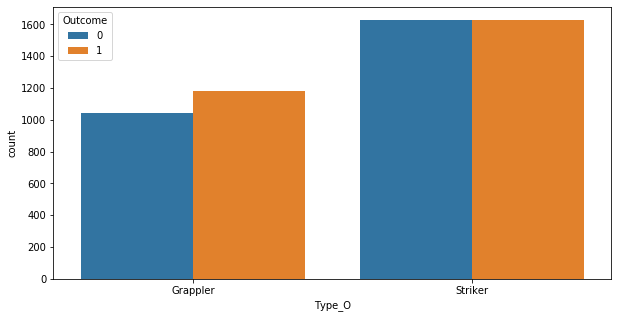

In [49]:
strikers = data_types_of_fighter_final[data_types_of_fighter_final['Type'] == 'Striker']
grapplers = data_types_of_fighter_final[data_types_of_fighter_final['Type'] == 'Grappler']

plt.figure(figsize=(10,5))
sns.countplot(strikers['Type_O'], hue = strikers['Outcome'])

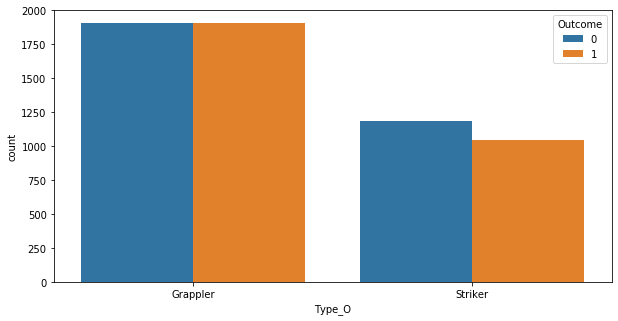

In [50]:
plt.figure(figsize=(10,5))
sns.countplot(grapplers['Type_O'], hue = grapplers['Outcome'])

## Linear Regressions

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [52]:
X = data[['ELO_dif', 'HT_dif', 'REACH_dif', 'TD_dif', 'KD_dif', 'STR_dif', 'SUB_dif']]
y = data['Outcome']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     25.14
Date:                Sat, 13 Mar 2021   Prob (F-statistic):           4.32e-34
Time:                        20:06:38   Log-Likelihood:                -4475.4
No. Observations:                6286   AIC:                             8967.
Df Residuals:                    6278   BIC:                             9021.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5000      0.006     80.337      0.0

/Users/thomas/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [53]:
X = data[['ELO_dif', 'HT_dif', 'REACH_dif', 'TD_dif', 'KD_dif', 'STR_dif', 'SUB_dif',
          'Days_dif', 'Rounds_dif', 'Seconds_in_Ring_dif', 'Perf_of_Night_dif',
          'Win_dif', 'Loss_dif']]
y = data['Outcome']
X2 = sm.add_constant(X)
est = sm.Logit(y, X2)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 0.671161
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                 6286
Model:                          Logit   Df Residuals:                     6272
Method:                           MLE   Df Model:                           13
Date:                Sat, 13 Mar 2021   Pseudo R-squ.:                 0.03172
Time:                        20:06:38   Log-Likelihood:                -4218.9
converged:                       True   LL-Null:                       -4357.1
Covariance Type:            nonrobust   LLR p-value:                 2.037e-51
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.739e-18      0.026   1.84e-16      1.000      -0.051       0.051
EL

In [66]:
X = data[['ELO_dif', 'HT_dif', 'REACH_dif', 'TD_dif', 'KD_dif', 'STR_dif', 'SUB_dif']]
y = data['Outcome']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit_regularized(method = 'elastic_net', L1_wt = 1.0)
# est2 = est.fit()
# print(est2.summary())

## Look and plot quadratic relationship with time out of the ring and between fights.